# Exploratory Data Analysis

conda activate tf310
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


## Feauture engineering

In [4]:
import pandas as pd

orig_df = pd.read_csv('Hair Care Survey_v2 (Responses) - Form responses 1.csv')
orig_df.head()

,Timestamp,Score,Age,Race,Gender,Country,Hair type,Hair porosity,Hair texture,Hair density,...,Main factor influencing your hair health or growth,Tips or products have worked well for your hair,Hair state and their cause: [Hydrated & Healthy],Hair state and their cause: [Promote Frizzy],Hair state and their cause: [Tangled],Hair state and their cause: [dryness & breaking],Would you participate in follow-up studies?,Email,Email address,SurveyCircle \n 'Thank-you-for-your-participation' page. Please use the following text line that contains your Survey Code:
0,16/04/2025 19:31,0 / 7,25-34,Black/African,Female,Namibia,4c,Low,Medium,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
1,23/04/2025 13:31,0 / 7,35-44,Black/African,Female,Namibia,3c,Medium,Medium,Medium,...,moisturising,gentle,Hot oil treatment,Shampoo,Shampoo,Shampoo,Yes,poppiculrs@gmail.com,NaN,NaN
2,24/04/2025 14:59,0 / 7,25-34,Black/African,Female,Namibia,3c,Medium,Medium,Medium,...,Moisturizer,NaN,Hot oil treatment,Shampoo,Shampoo,Shampoo,Yes,psndalipo@gmail.com,NaN,NaN
3,24/04/2025 16:20,0 / 7,25-34,Black/African,Female,NaN,3c,High,Coarse,High,...,Lack of consistency,NaN,Herbal oil,Hair Gel,Shampoo,Shampoo,Yes,NaN,NaN,NaN
4,28/04/2025 13:43,0 / 7,25-34,Black/African,Female,Namibia,4b,Medium,Coarse,Low,...,Lifestyle,Castor Oil and changing the hair I braid with....,Hair Masks,Shampoo,Leave-In Conditioner,Hair Gel,Yes,shyner771@gmail.com,shyner771@gmail.com,NaN


## 1. Data Cleaning and nomalization

In [6]:
# Clean column names: strip whitespace, convert to lowercase, replace spaces and special chars

# Drop irrelevant columns (e.g., email, survey codes, etc.)
columns_to_drop = [
    'Timestamp', 'Score', 'Email', 'Email address',
    "SurveyCircle  \n  'Thank-you-for-your-participation' page. Please use the following text line that contains your Survey Code:",
    'Column 53', 'Would you participate in follow-up studies?'
]

df = orig_df

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Strip whitespace from column names and make them lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)


## 2. Basic Overview

In [9]:
# Dataset shape and summary
print("Shape:\n", df.shape)
print("\nColumns:", df.columns.tolist())

# Missing values
missing = df.isnull().sum()
print("\nMissing values:\n", missing[missing > 0])


Shape:
 (132, 48)

Columns: ['age', 'race', 'gender', 'country', 'hair_type', 'hair_porosity', 'hair_texture', 'hair_density', 'harline_condition', 'hair_edges_condition', 'hair_loss_state', 'hair_breakage', 'hair_length_current_hair_length', 'hair_length_hair_goal', 'hair_look', 'current_hair_condition', 'scalp_condition', 'ingredient_promotes_your_hair_health', 'is_your_hair_chemically_treated', 'keratin_treatment', 'professional_treatments', 'protective_hairstyles_no_1', 'protective_hairstyles_no_2', 'condition_of_protective_hairstyles_used', 'protective_hairstyles_maintenance', 'how_often_do_you_heatstyling_tools', 'how_often_do_you_tight_hairstyle', 'how_often_do_you_hair_moisturizer', 'how_often_do_you_scalp_massages', 'how_often_do_you_hair_wash', 'occurrence_of_hair_breakage', 'causes_of_hair_breakage', 'other_please_specify', 'comb_type', 'detangling_style', 'hair_supplement_used', 'medication_or_condition_affecting_hair_growth', 'hair_or_scalp_allergies', 'family_history_of_h

## Feature importance

In [22]:
df.dtypes

age                                                    object
race                                                   object
gender                                                 object
country                                                object
hair_type                                              object
hair_porosity                                          object
hair_texture                                           object
hair_density                                           object
harline_condition                                     float64
hair_edges_condition                                   object
hair_loss_state                                        object
hair_breakage                                          object
hair_length_current_hair_length                        object
hair_length_hair_goal                                  object
hair_look                                              object
current_hair_condition                                 object
scalp_co

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Copy the DataFrame (optional but safe)
data = df.copy()

# Choose your target column
target_col = 'current_hair_condition'

# Separate features (X) and target (y)
X = data.drop(columns=[target_col])
y = data[target_col]

# Convert all categorical columns in X to numeric using LabelEncoder
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# If target column is also categorical, encode it too
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y.astype(str))

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Compute feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Display results
print("🔍 Feature Importance Ranking:\n")
for feature, importance in importances.items():
    print(f"{feature:45} : {importance:.4f}")

# (Optional) Display as a DataFrame for Jupyter
display(importances.to_frame(name='Importance'))



🔍 Feature Importance Ranking:

occurrence_of_hair_breakage                   : 0.0567
hair_look                                     : 0.0554
tips_or_products_have_worked_well_for_your_hair : 0.0364
country                                       : 0.0359
main_factor_influencing_your_hair_health_or_growth : 0.0338
hair_supplement_used                          : 0.0313
how_often_do_you_tight_hairstyle              : 0.0306
consumed_waterday_l                           : 0.0303
how_often_do_you_scalp_massages               : 0.0285
hair_state_and_their_cause_dryness__breaking  : 0.0271
ingredient_promotes_your_hair_health          : 0.0258
how_often_do_you_heatstyling_tools            : 0.0254
hair_loss_state                               : 0.0243
hair_state_and_their_cause_tangled            : 0.0242
hair_porosity                                 : 0.0237
detangling_style                              : 0.0236
medication_or_condition_affecting_hair_growth : 0.0235
hair_type                  

,Importance
occurrence_of_hair_breakage,0.056656
hair_look,0.055413
tips_or_products_have_worked_well_for_your_hair,0.036353
country,0.035889
main_factor_influencing_your_hair_health_or_growth,0.033786
hair_supplement_used,0.031280
how_often_do_you_tight_hairstyle,0.030641
consumed_waterday_l,0.030259
how_often_do_you_scalp_massages,0.028514
hair_state_and_their_cause_dryness__breaking,0.027077


# ✅ Step 3: Demographic Distribution

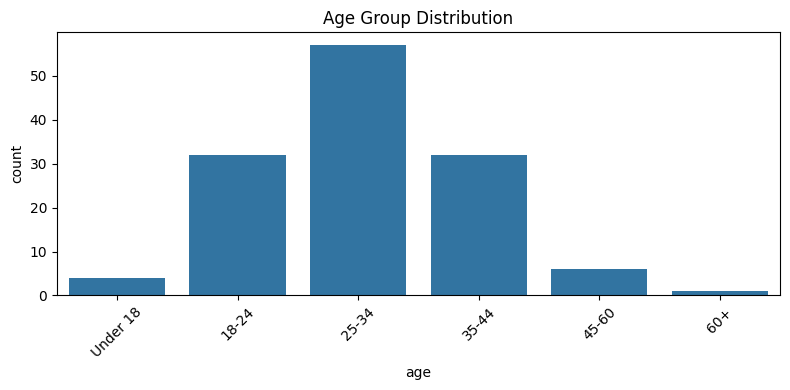

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the correct order for age groups
age_order = ['Under 18', '18-24', '25-34', '35-44', '45-60', '60+']

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age', order=age_order)
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


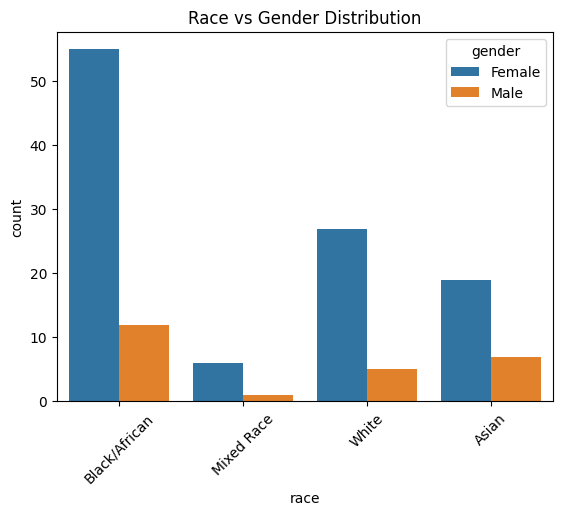

In [12]:
#Race and Gender
sns.countplot(data=df, x='race', hue='gender')
plt.title('Race vs Gender Distribution')
plt.xticks(rotation=45)
plt.show()


# ✅ Step 4: Hair Type & Porosity

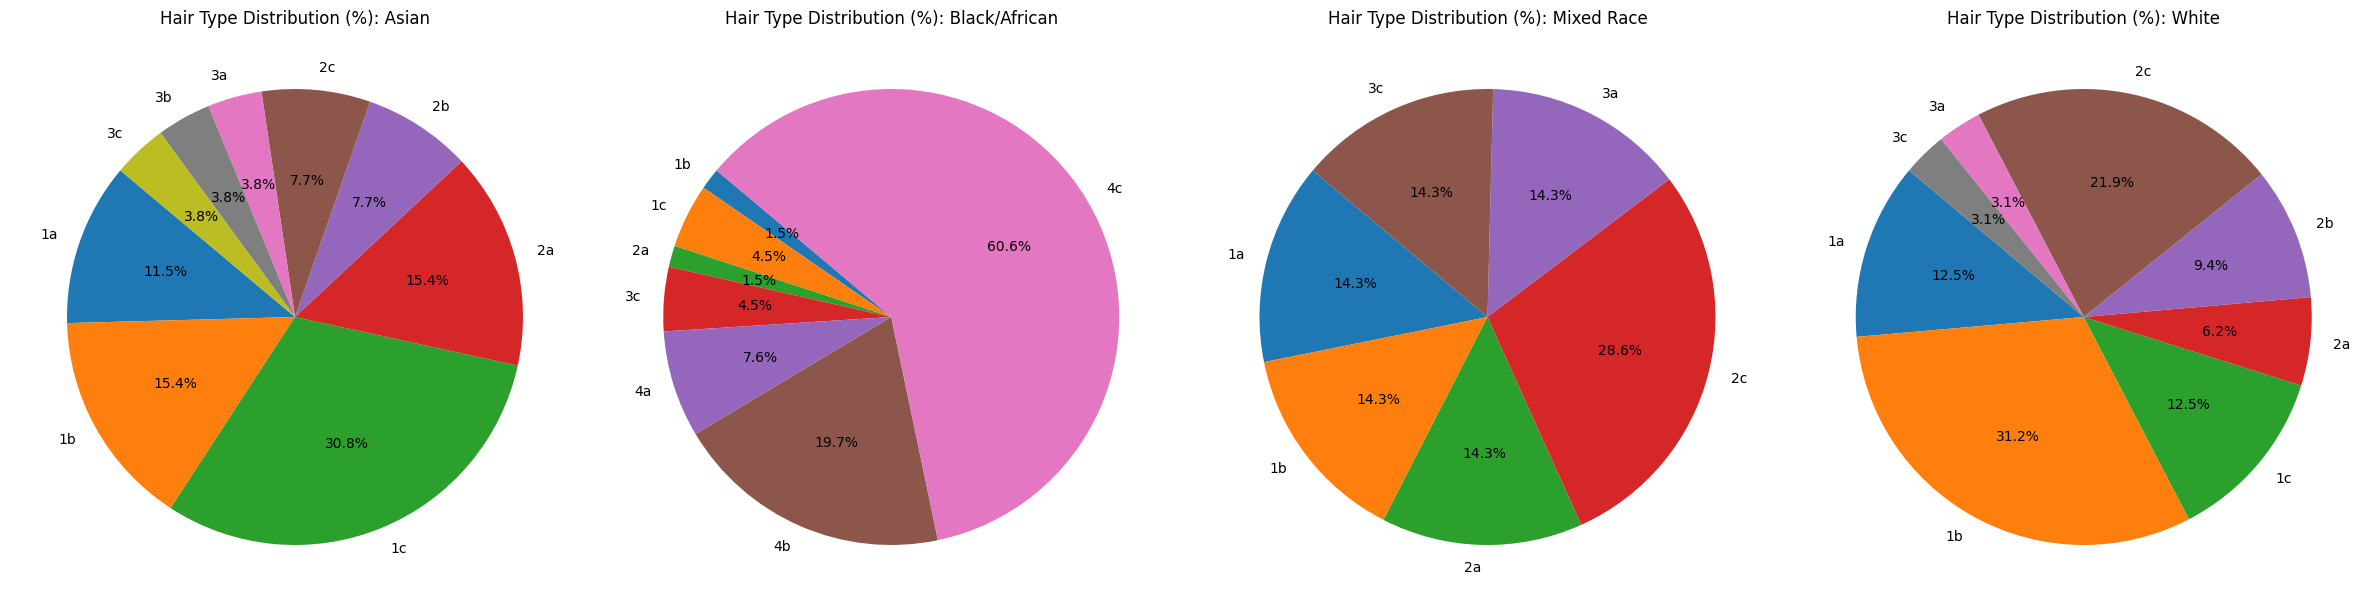

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by race and hair type, then calculate percentages
grouped = df.groupby(['race', 'hair_type']).size().reset_index(name='count')
total_per_race = grouped.groupby('race')['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_race * 100

# Plot one pie chart per race
races = grouped['race'].unique()
num_races = len(races)

fig, axes = plt.subplots(1, num_races, figsize=(6 * num_races, 6))

if num_races == 1:
    axes = [axes]  # Handle single-race case

for ax, race in zip(axes, races):
    subset = grouped[grouped['race'] == race]
    ax.pie(subset['percentage'], labels=subset['hair_type'], autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Hair Type Distribution (%): {race}')

plt.tight_layout()
plt.show()


/var/folders/sd/2tmrf4ds7nqg7lk_wdy856vm0000gn/T/ipykernel_14736/4275294316.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_race = grouped.groupby('race')['count'].transform('sum')


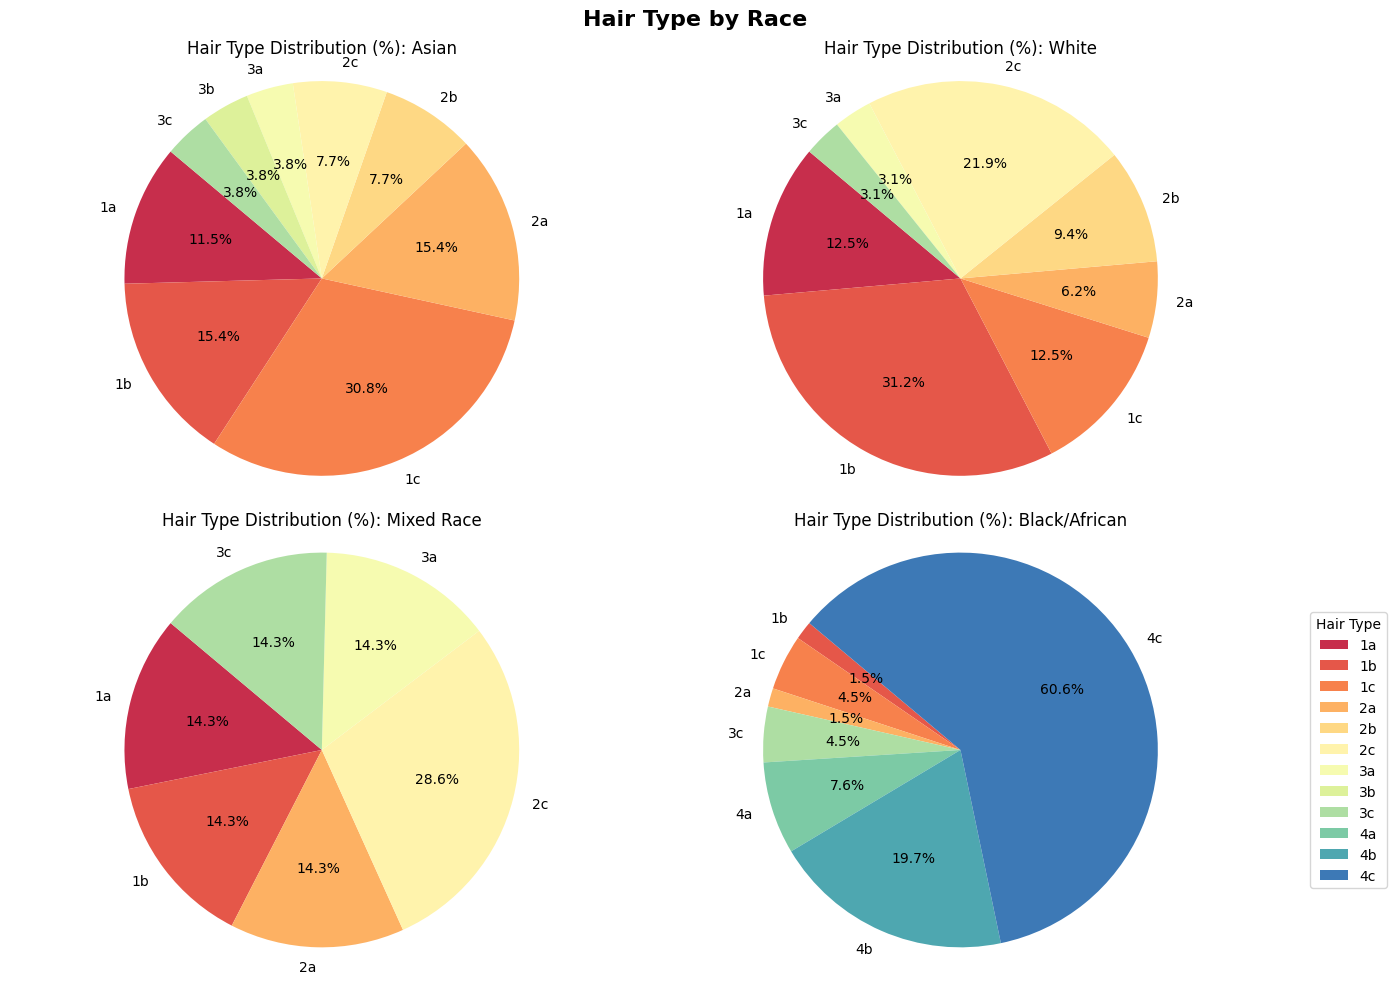

In [235]:

import seaborn as sns
from matplotlib.patches import Patch

# Standardize and clean columns
df['race'] = df['race'].str.strip()
df['hair_type'] = df['hair_type'].str.strip()

# Define consistent order
hair_type_order = ['1a', '1b', '1c', '2a', '2b', '2c', '3a', '3b', '3c', '4a', '4b', '4c']
race_order = ['Asian', 'White', 'Mixed Race', 'Black/African']

# Filter valid entries only
df = df[df['race'].isin(race_order) & df['hair_type'].isin(hair_type_order)]

# Group and compute percentage per race
grouped = df.groupby(['race', 'hair_type']).size().reset_index(name='count')
grouped['race'] = pd.Categorical(grouped['race'], categories=race_order, ordered=True)
grouped['hair_type'] = pd.Categorical(grouped['hair_type'], categories=hair_type_order, ordered=True)
grouped.sort_values(['race', 'hair_type'], inplace=True)

total_per_race = grouped.groupby('race')['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_race * 100

# Color map for hair types
color_palette = sns.color_palette("Spectral", len(hair_type_order))
#color_palette = sns.color_palette("hls", len(hair_type_order))

hair_type_color_map = dict(zip(hair_type_order, color_palette))

# Plot
races = grouped['race'].unique()
num_races = len(races)
#fig, axes = plt.subplots(1, num_races, figsize=(6 * num_races, 6))

# Setup 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()


if num_races == 1:
    axes = [axes]

for ax, race in zip(axes, races):
    subset = grouped[grouped['race'] == race]
    colors = [hair_type_color_map[ht] for ht in subset['hair_type']]
    ax.pie(subset['percentage'], labels=subset['hair_type'], autopct='%1.1f%%',
           colors=colors, startangle=140)
    ax.set_title(f'Hair Type Distribution (%): {race}', fontsize=12)
    ax.axis('equal')

# Shared legend on the right
legend_elements = [Patch(facecolor=hair_type_color_map[ht], label=ht) for ht in hair_type_order]
plt.suptitle('Hair Type by Race', fontsize=16, fontweight='bold')
plt.legend(handles=legend_elements, title="Hair Type", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


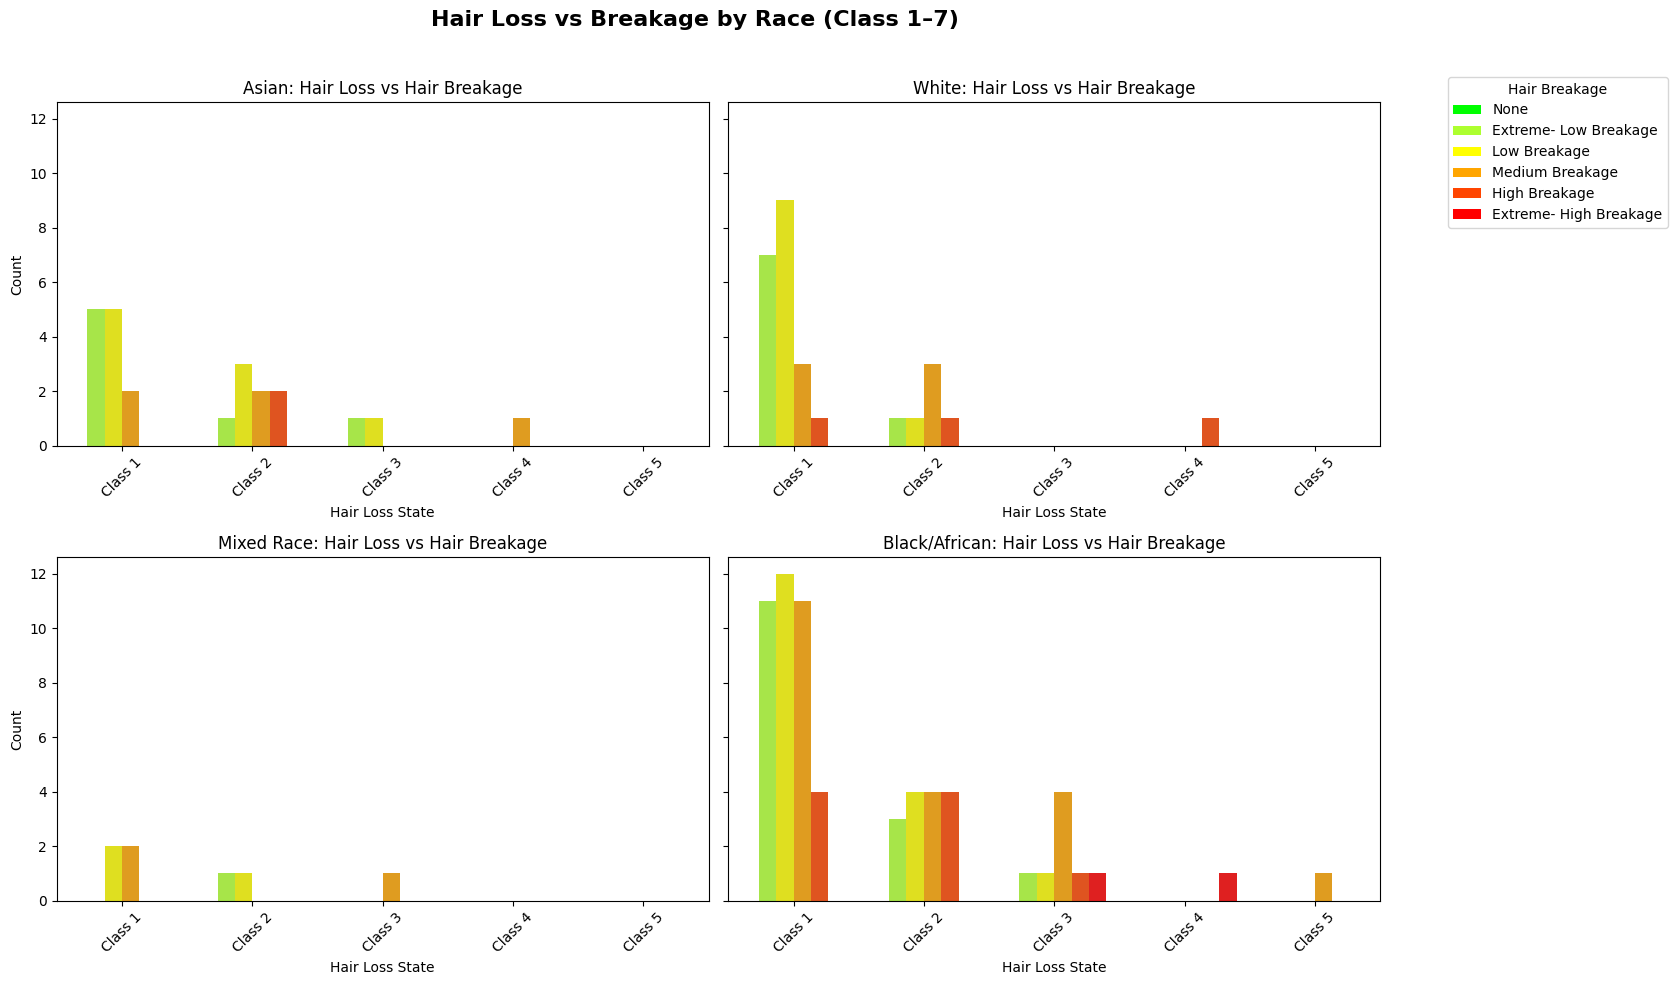

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define hair_loss_state order and colors
hair_loss_order = [f'Class {i}' for i in range(1, 6)]
# Example: hair_loss_colors = sns.color_palette("YlOrRd", len(hair_loss_order))
hair_loss_color_map = dict(zip(hair_loss_order, hair_loss_colors))

# Define consistent breakage color palette
hair_breakage_order = [
    'None', 'Extreme- Low Breakage', 'Low Breakage',
    'Medium Breakage', 'High Breakage', 'Extreme- High Breakage'
]

hair_breakage_palette = {
    'None': '#00FF00',                   # neon green
    'Extreme- Low Breakage': '#ADFF2F',  # bright green-yellow (GreenYellow)
    'Low Breakage': '#FFFF00',           # bright yellow
    'Medium Breakage': '#FFA500',        # bright orange
    'High Breakage': '#FF4500',          # orange-red (OrangeRed)
    'Extreme- High Breakage': '#FF0000'  # pure red
}



# Clean race column
df['race'] = df['race'].str.strip()
race_order = ['Asian', 'White', 'Mixed Race', 'Black/African']
df_filtered = df[df['race'].isin(race_order)]

# Setup 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

# Plot per race
for ax, race in zip(axes, race_order):
    subset = df_filtered[df_filtered['race'] == race]
    
    sns.countplot(
        data=subset,
        x='hair_loss_state',
        hue='hair_breakage',
        ax=ax,
        order=hair_loss_order,
        hue_order=hair_breakage_order,
        palette=hair_breakage_palette,
        
    )
    
    ax.set_title(f'{race}: Hair Loss vs Hair Breakage')
    ax.set_xlabel('Hair Loss State')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
    # Remove subplot legend
    ax.get_legend().remove()

# Custom legend outside the plots
breakage_legend = [
    Patch(facecolor=color, label=label)
    for label, color in hair_breakage_palette.items()
]

fig.legend(handles=breakage_legend, title='Hair Breakage', loc='upper right', bbox_to_anchor=(1.2, 0.92))

# Title and layout
plt.suptitle('Hair Loss vs Breakage by Race (Class 1–7)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


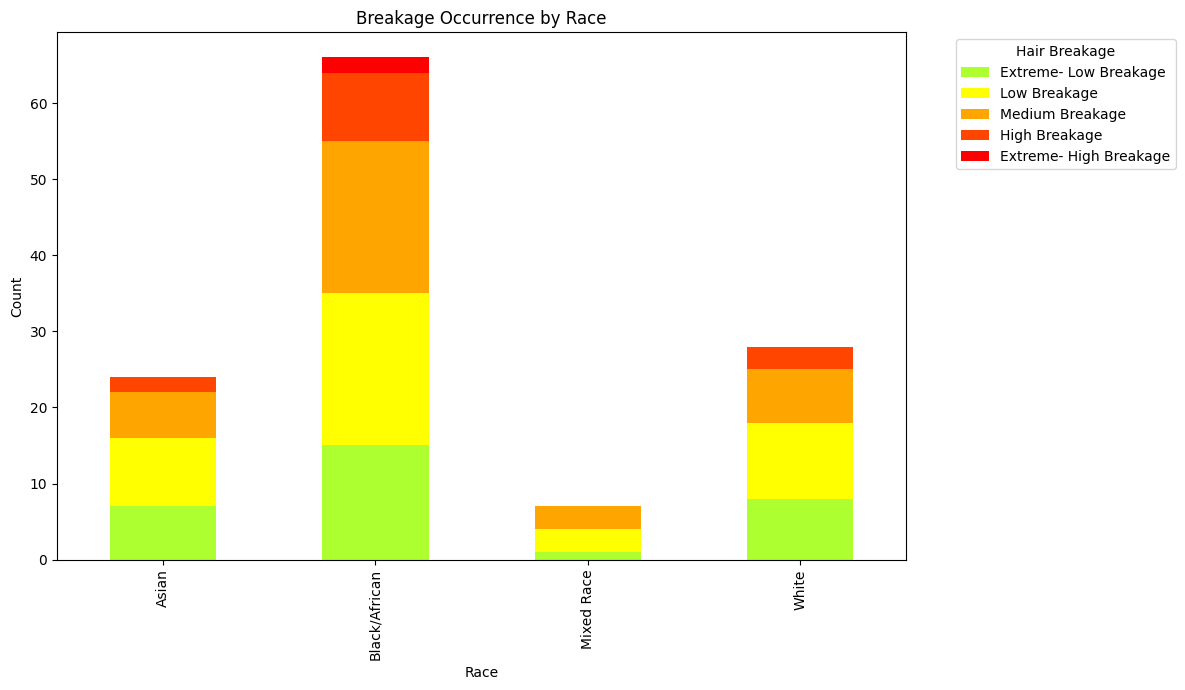

In [187]:
import matplotlib.pyplot as plt
import pandas as pd

# === Bright Hair Breakage Palette ===
hair_breakage_palette = {
    'Extreme- Low Breakage': '#ADFF2F',  # green-yellow
    'Low Breakage': '#FFFF00',           # bright yellow
    'Medium Breakage': '#FFA500',        # orange
    'High Breakage': '#FF4500',          # orange-red
    'Extreme- High Breakage': '#FF0000'  # red
}

# === A. Breakage by Race (stacked bar plot) ===
breakage_ct = pd.crosstab(df['race'], df['hair_breakage'])

# Reorder columns based on the palette keys
breakage_ct = breakage_ct[[
    'Extreme- Low Breakage', 
    'Low Breakage', 
    'Medium Breakage', 
    'High Breakage', 
    'Extreme- High Breakage'
]]

# Plot with the custom colors
breakage_ct.plot(
    kind='bar', 
    stacked=True, 
    color=[hair_breakage_palette[br] for br in breakage_ct.columns],
    figsize=(12, 7)  # <- Bigger figure size
)

plt.title('Breakage Occurrence by Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.legend(title='Hair Breakage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



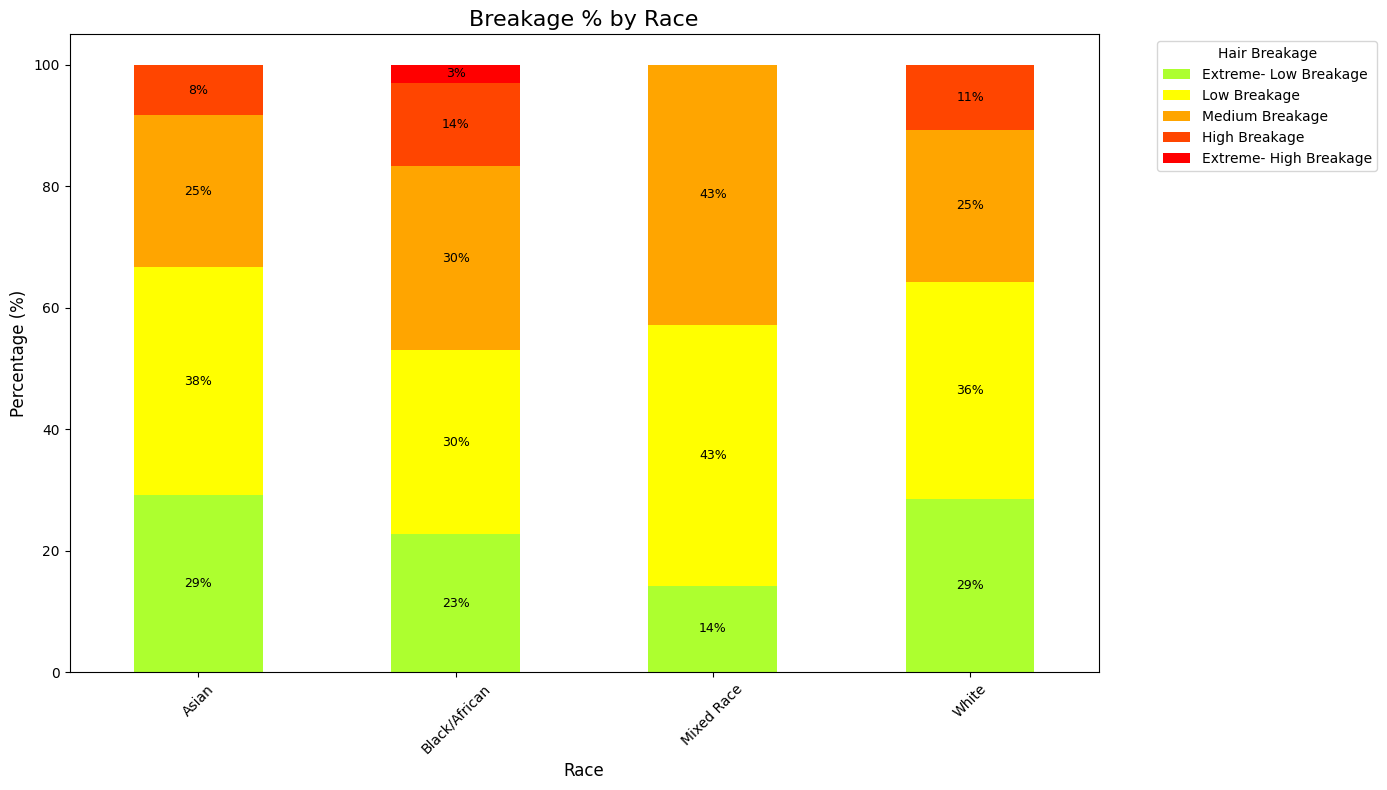

In [193]:
import matplotlib.pyplot as plt
import pandas as pd

# === Bright Hair Breakage Palette ===
hair_breakage_palette = {
    'Extreme- Low Breakage': '#ADFF2F',  # green-yellow
    'Low Breakage': '#FFFF00',           # yellow
    'Medium Breakage': '#FFA500',        # orange
    'High Breakage': '#FF4500',          # orange-red
    'Extreme- High Breakage': '#FF0000'  # red
}

# === Cross-tab and Normalize by Row to Get % ===
breakage_ct = pd.crosstab(df['race'], df['hair_breakage'])

# Ensure columns are in the correct order
ordered_cols = [
    'Extreme- Low Breakage',
    'Low Breakage',
    'Medium Breakage',
    'High Breakage',
    'Extreme- High Breakage'
]
breakage_ct = breakage_ct[ordered_cols]

# Normalize to get percentage per race
breakage_pct = breakage_ct.div(breakage_ct.sum(axis=1), axis=0) * 100

# Plot
ax = breakage_pct.plot(
    kind='bar', 
    stacked=True, 
    color=[hair_breakage_palette[col] for col in breakage_pct.columns],
    figsize=(14, 8),
)

# === Add % text on bars ===
for container in ax.containers:
    labels = [f'{v.get_height():.0f}%' if v.get_height() > 1 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='black')

plt.title('Breakage % by Race', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hair Breakage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


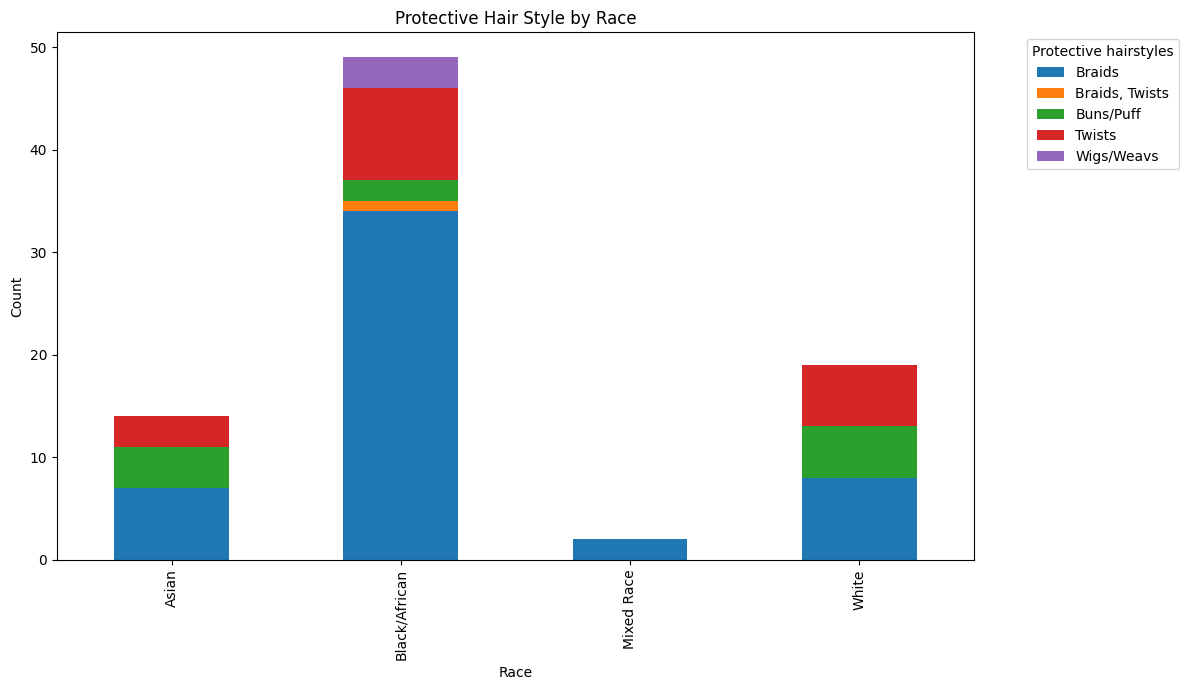

In [203]:
# === A. Protective hairstyles by Race (stacked bar plot) ===
hairstyle_ct = pd.crosstab(df['race'], df['protective_hairstyles_no_1'])

# Plot with the custom colors
hairstyle_ct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 7)  # <- Bigger figure size
)

plt.title('Protective Hair Style by Race')
plt.ylabel('Count')
plt.xlabel('Race')
plt.legend(title='Protective hairstyles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


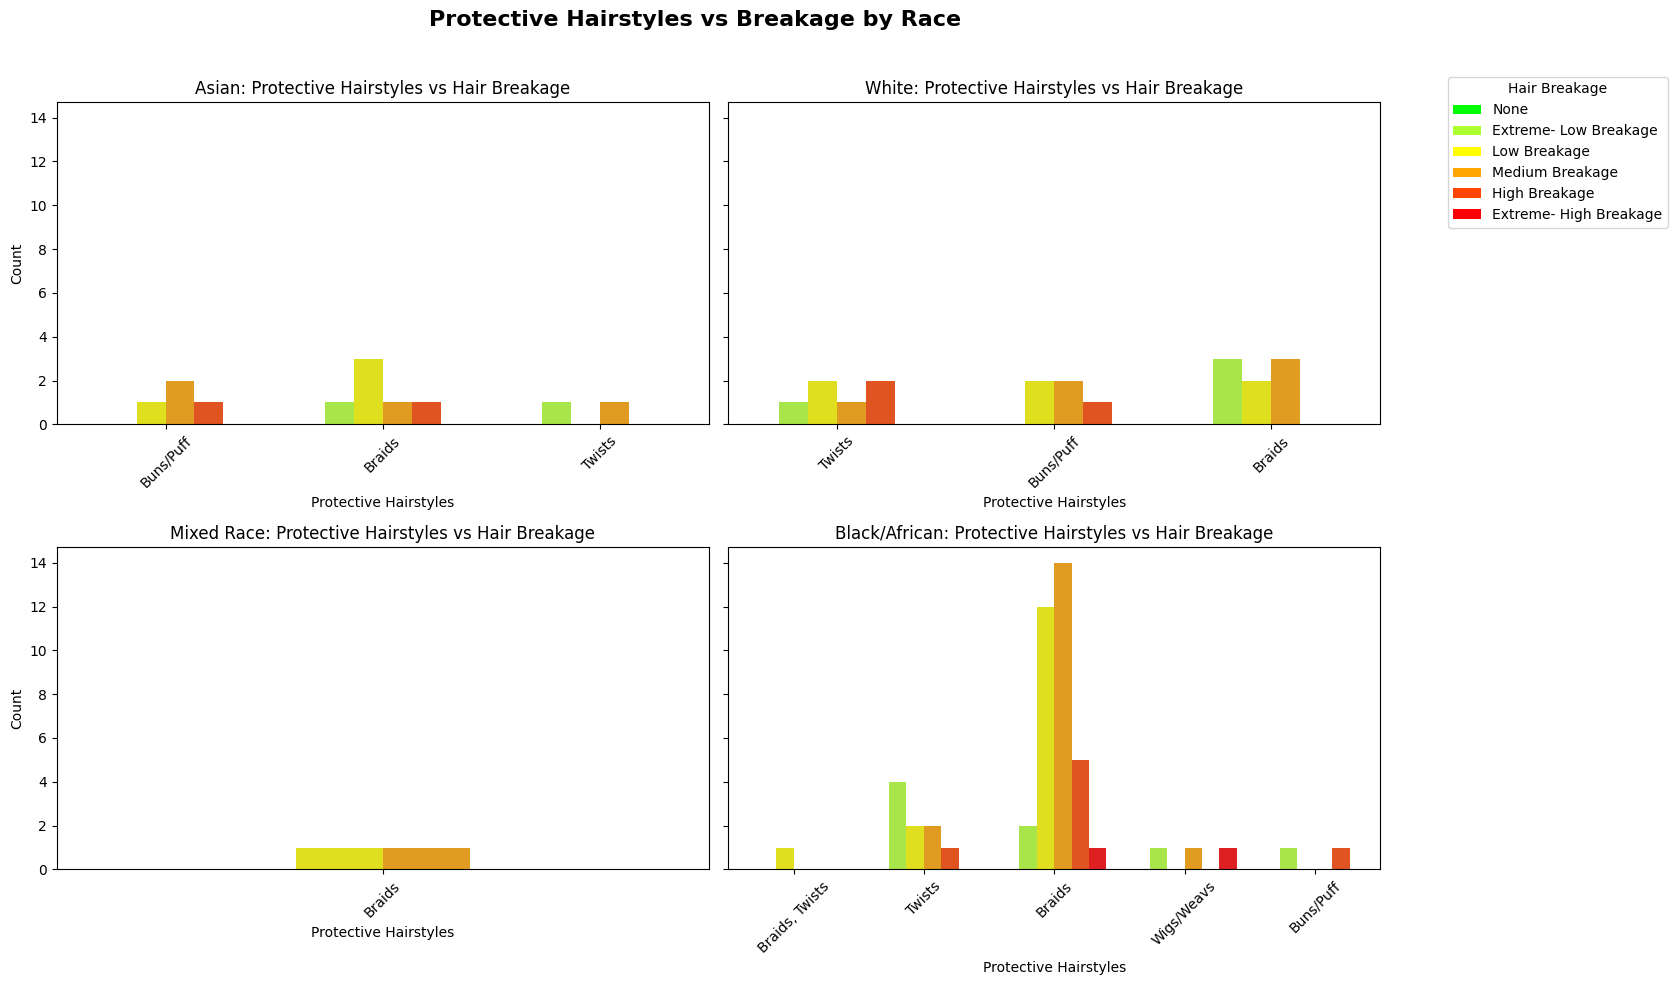

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# Define consistent breakage color palette
hair_breakage_order = [
    'None', 'Extreme- Low Breakage', 'Low Breakage',
    'Medium Breakage', 'High Breakage', 'Extreme- High Breakage'
]

hair_breakage_palette = {
    'None': '#00FF00',                   # neon green
    'Extreme- Low Breakage': '#ADFF2F',  # bright green-yellow (GreenYellow)
    'Low Breakage': '#FFFF00',           # bright yellow
    'Medium Breakage': '#FFA500',        # bright orange
    'High Breakage': '#FF4500',          # orange-red (OrangeRed)
    'Extreme- High Breakage': '#FF0000'  # pure red
}

# Clean race column
df['race'] = df['race'].str.strip()
race_order = ['Asian', 'White', 'Mixed Race', 'Black/African']
df_filtered = df[df['race'].isin(race_order)]

# Setup 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

# Plot per race
for ax, race in zip(axes, race_order):
    subset = df_filtered[df_filtered['race'] == race]
    
    sns.countplot(
        data=subset,
        x='protective_hairstyles_no_1',
        hue='hair_breakage',
        ax=ax,
        hue_order=hair_breakage_order,
        palette=hair_breakage_palette,
        
    )
    
    ax.set_title(f'{race}: Protective Hairstyles vs Hair Breakage')
    ax.set_xlabel('Protective Hairstyles')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
    # Remove subplot legend
    ax.get_legend().remove()

# Custom legend outside the plots
breakage_legend = [
    Patch(facecolor=color, label=label)
    for label, color in hair_breakage_palette.items()
]

fig.legend(handles=breakage_legend, title='Hair Breakage', loc='upper right', bbox_to_anchor=(1.2, 0.92))

# Title and layout
plt.suptitle('Protective Hairstyles vs Breakage by Race', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


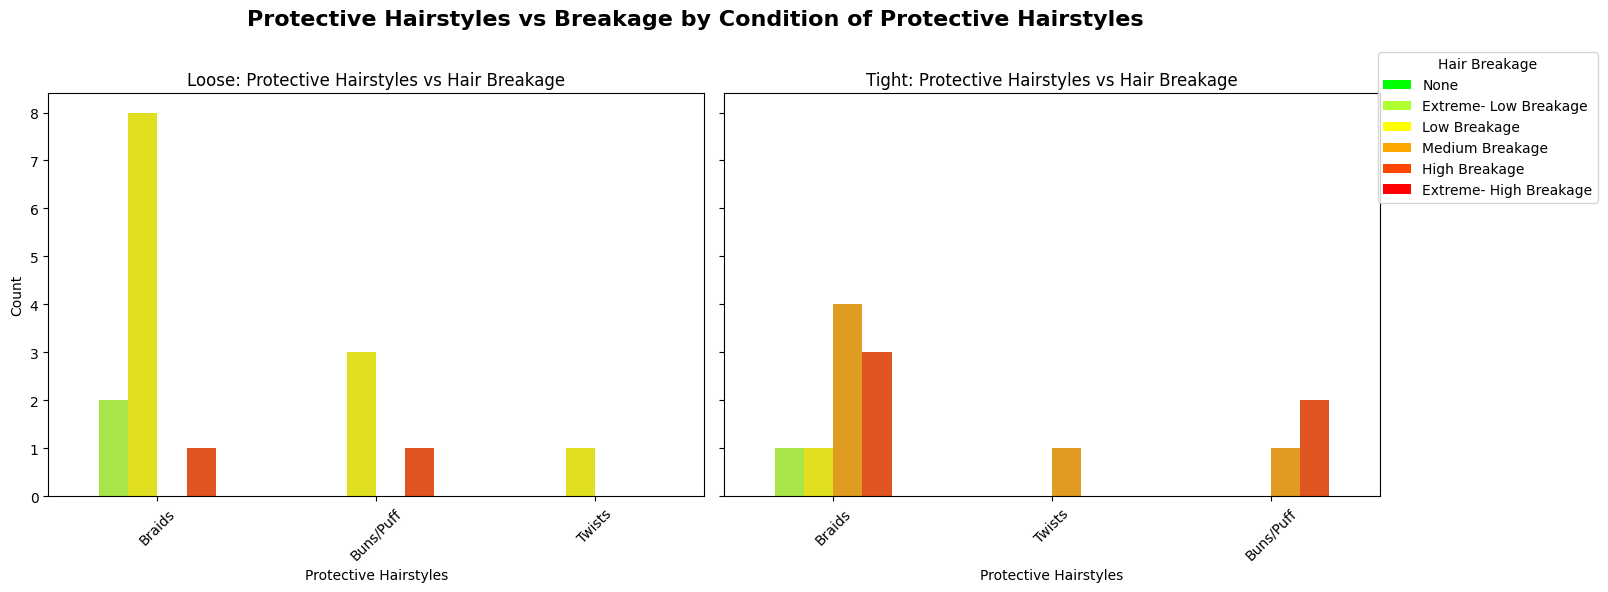

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define consistent breakage color palette
hair_breakage_order = [
    'None', 'Extreme- Low Breakage', 'Low Breakage',
    'Medium Breakage', 'High Breakage', 'Extreme- High Breakage'
]

hair_breakage_palette = {
    'None': '#00FF00',                   # neon green
    'Extreme- Low Breakage': '#ADFF2F',  # bright green-yellow (GreenYellow)
    'Low Breakage': '#FFFF00',           # bright yellow
    'Medium Breakage': '#FFA500',        # bright orange
    'High Breakage': '#FF4500',          # orange-red (OrangeRed)
    'Extreme- High Breakage': '#FF0000'  # pure red
}

# Clean column
df['condition_of_protective_hairstyles_used'] = df['condition_of_protective_hairstyles_used'].str.strip()
condition_order = ['Loose', 'Tight']
df_filtered = df[df['condition_of_protective_hairstyles_used'].isin(condition_order)]

# Setup subplot grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes = axes.flatten()

# Plot per condition
for ax, condition in zip(axes, condition_order):
    subset = df_filtered[df_filtered['condition_of_protective_hairstyles_used'] == condition]
    
    sns.countplot(
        data=subset,
        x='protective_hairstyles_no_1',
        hue='hair_breakage',
        ax=ax,
        hue_order=hair_breakage_order,
        palette=hair_breakage_palette,
    )
    
    ax.set_title(f'{condition}: Protective Hairstyles vs Hair Breakage')
    ax.set_xlabel('Protective Hairstyles')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
    # Remove subplot legend
    ax.get_legend().remove()

# Custom legend outside
breakage_legend = [
    Patch(facecolor=color, label=label)
    for label, color in hair_breakage_palette.items()
]

fig.legend(handles=breakage_legend, title='Hair Breakage', loc='upper right', bbox_to_anchor=(1.15, 0.92))

# Title and layout
plt.suptitle('Protective Hairstyles vs Breakage by Condition of Protective Hairstyles', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# ✅ Step 5: Hair Loss & Breakage

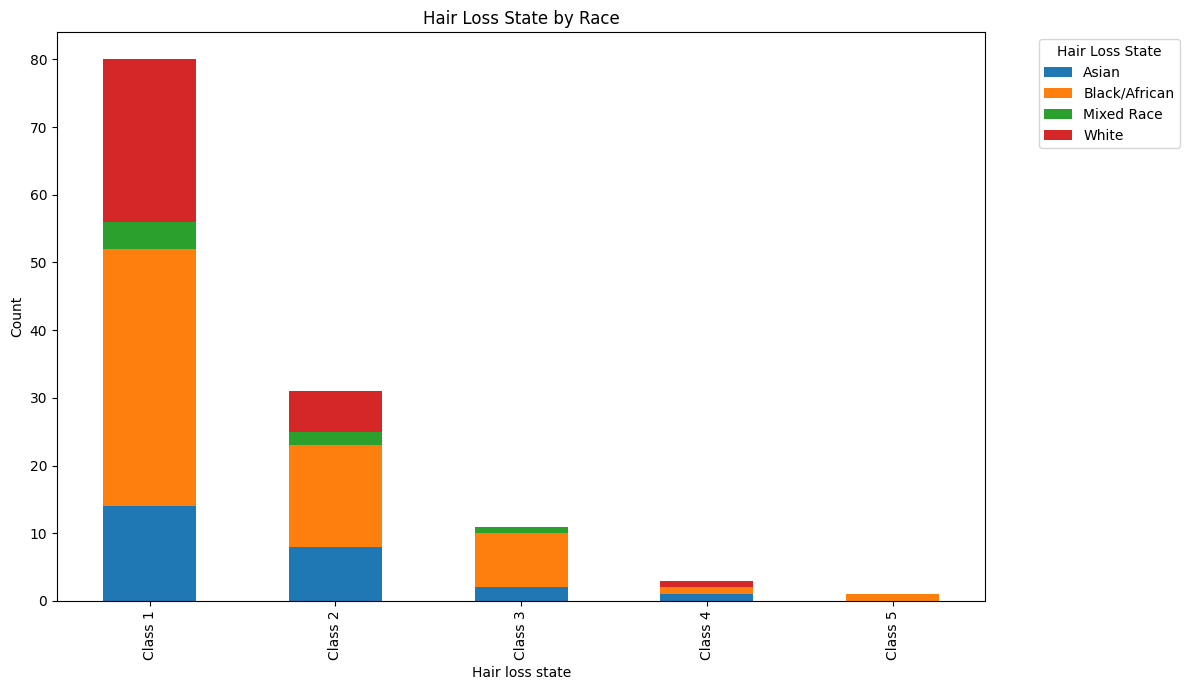

In [207]:
# === A. `Hair loss by Race (stacked bar plot) ===
hairLoss_ct = pd.crosstab(df['hair_loss_state'], df['race'])

# Plot with the custom colors
hairLoss_ct.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 7)  # <- Bigger figure size
)

plt.title('Hair Loss State by Race')
plt.ylabel('Count')
plt.xlabel('Hair loss state')
plt.legend(title='Hair Loss State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

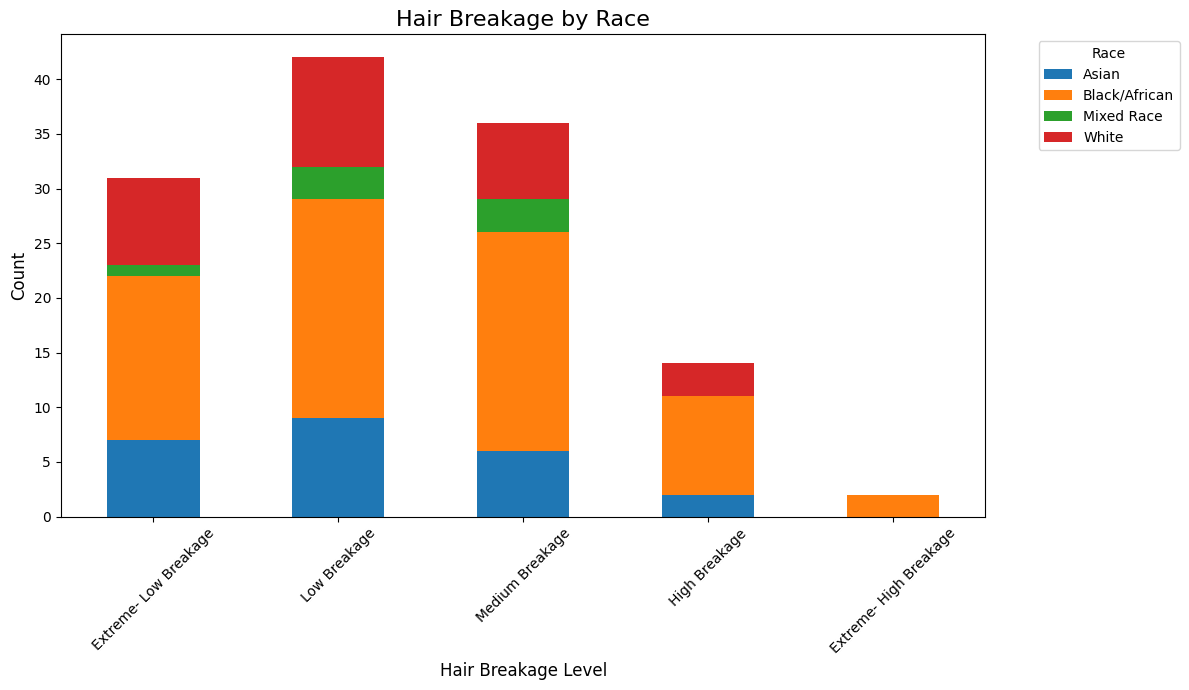

In [227]:
# Custom breakage order and filter
breakage_order = ['Extreme- Low Breakage', 'Low Breakage', 'Medium Breakage', 'High Breakage', 'Extreme- High Breakage']
df_filt = df[df['hair_breakage'].isin(breakage_order)]

# Crosstab: index = hair_breakage, columns = race
hairLoss_ct = pd.crosstab(df_filt['hair_breakage'], df['race'])

# Reindex the rows to match your desired order
hairLoss_ct = hairLoss_ct.reindex(breakage_order)

# Plot with fixed order
ax = hairLoss_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
)

plt.title('Hair Breakage by Race', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hair Breakage Level', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


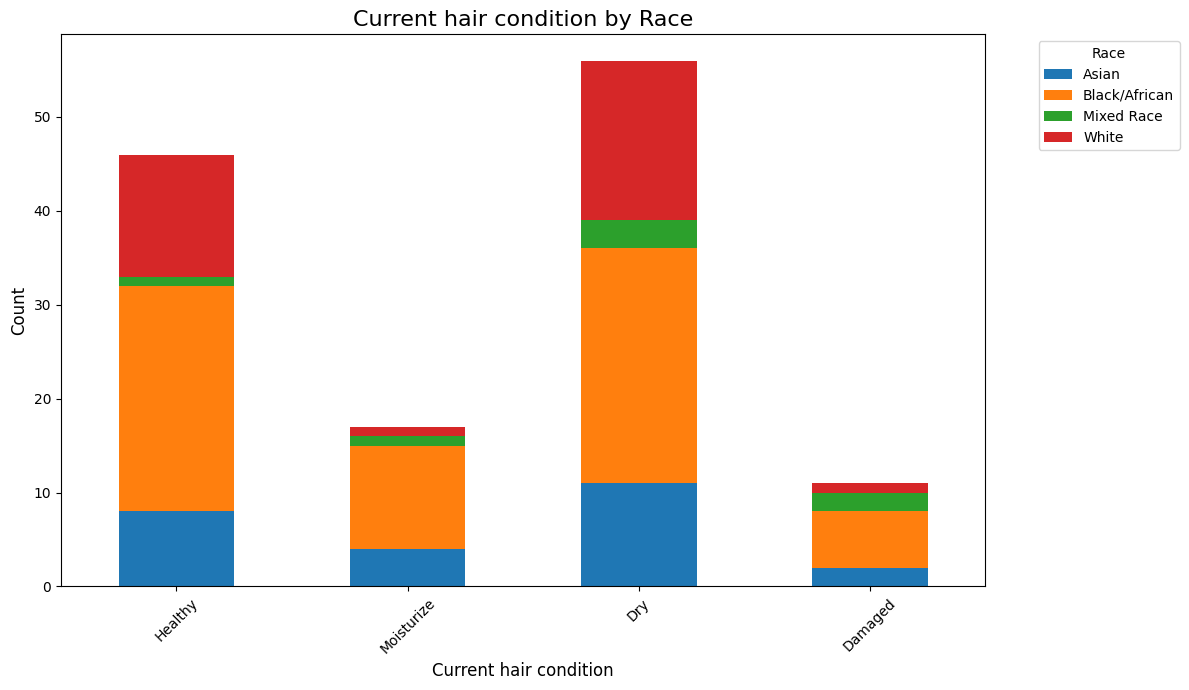

In [233]:
# Custom breakage order and filter
hairstate_order = ['Healthy', 'Moisturize', 'Dry', 'Damaged']
df_fil = df[df['current_hair_condition'].isin(hairstate_order)]

# Crosstab: index = hair_state, columns = race
hairstate_ct = pd.crosstab(df_fil['current_hair_condition'], df['race'])

# Reindex the rows to match your desired order
hairstate_ct = hairstate_ct.reindex(hairstate_order)

# Plot with fixed order
ax = hairstate_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
)

plt.title('Current hair condition by Race', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Current hair condition', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/sd/2tmrf4ds7nqg7lk_wdy856vm0000gn/T/ipykernel_14736/3731419414.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_race = grouped.groupby('race')['count'].transform('sum')


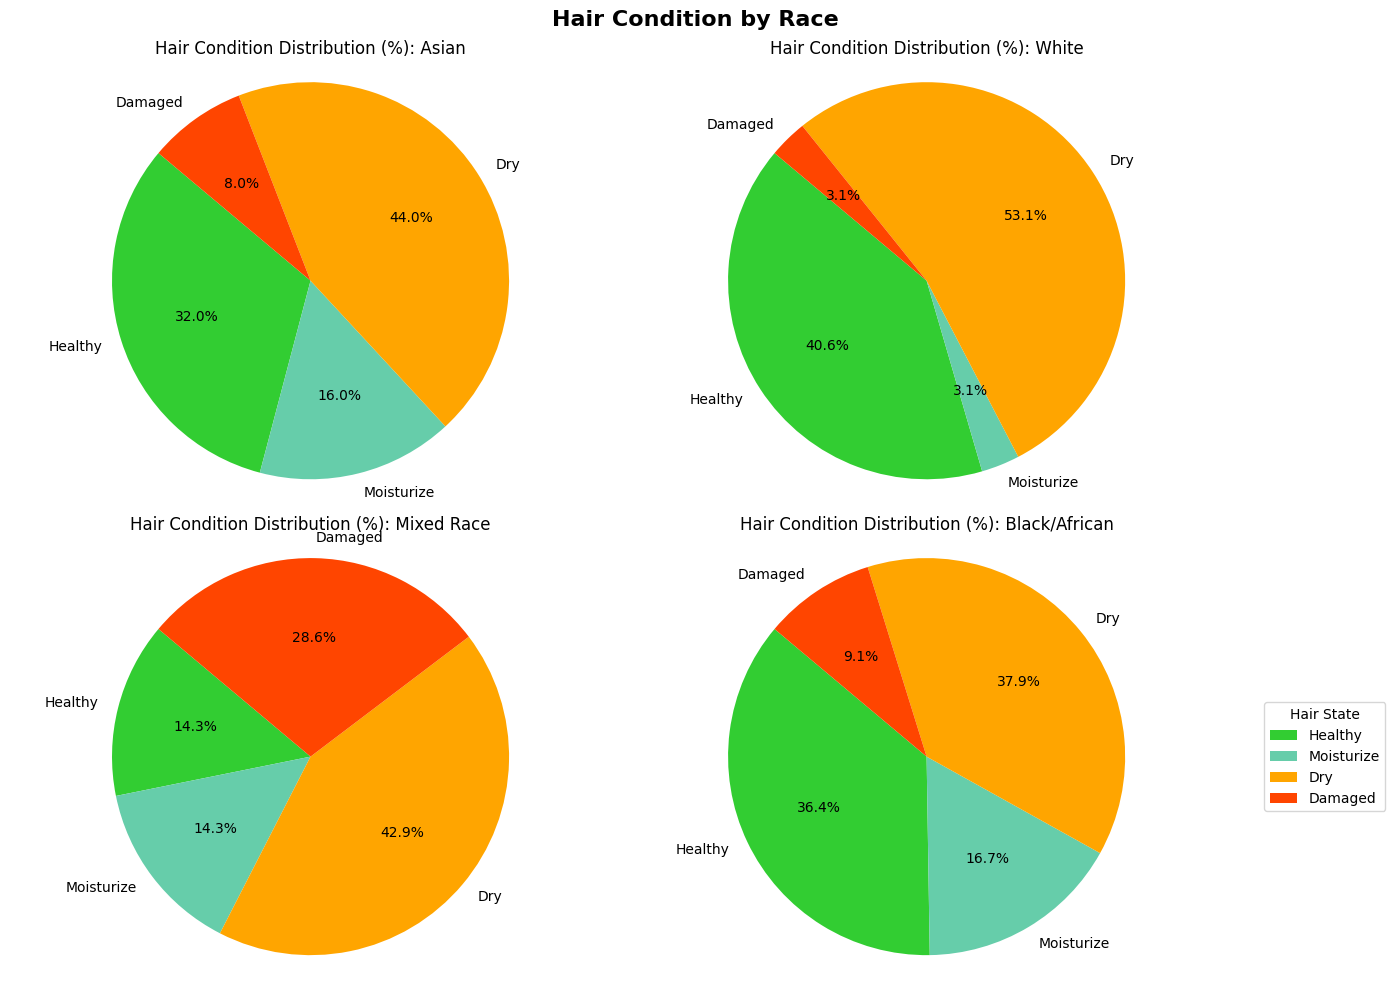

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Standardize and clean columns
df['race'] = df['race'].str.strip()
df['current_hair_condition'] = df['current_hair_condition'].str.strip()

# Define consistent order
hairstate_order = ['Healthy', 'Moisturize', 'Dry', 'Damaged']
race_order = ['Asian', 'White', 'Mixed Race', 'Black/African']

# Filter valid entries only
df = df[df['race'].isin(race_order) & df['current_hair_condition'].isin(hairstate_order)]

# Group and compute percentage per race
grouped = df.groupby(['race', 'current_hair_condition']).size().reset_index(name='count')
grouped['race'] = pd.Categorical(grouped['race'], categories=race_order, ordered=True)
grouped['current_hair_condition'] = pd.Categorical(grouped['current_hair_condition'], categories=hairstate_order, ordered=True)
grouped.sort_values(['race', 'current_hair_condition'], inplace=True)

# Compute percentages
total_per_race = grouped.groupby('race')['count'].transform('sum')
grouped['percentage'] = grouped['count'] / total_per_race * 100

# Custom bright color mapping
hair_type_color_map = {
    'Healthy': '#32CD32',    # LimeGreen (fresh, clean pop green)
    'Moisturize': '#66CDAA', # MediumAquamarine (vivid mint green)
    'Dry': '#FFA500',        # Orange (punchy and bright but readable)
    'Damaged': '#FF4500'     # OrangeRed (strong red-orange)
}



# Plot
races = grouped['race'].unique()
num_races = len(races)

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

for ax, race in zip(axes, races):
    subset = grouped[grouped['race'] == race]
    colors = [hair_type_color_map[ht] for ht in subset['current_hair_condition']]
    ax.pie(
        subset['percentage'],
        labels=subset['current_hair_condition'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=140
    )
    ax.set_title(f'Hair Condition Distribution (%): {race}', fontsize=12)
    ax.axis('equal')

# Hide any unused subplots
for ax in axes[num_races:]:
    ax.axis('off')

# Shared legend
legend_elements = [Patch(facecolor=hair_type_color_map[ht], label=ht) for ht in hairstate_order]
plt.suptitle('Hair Condition by Race', fontsize=16, fontweight='bold')
plt.legend(handles=legend_elements, title="Hair State", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.tight_layout()
plt.show()


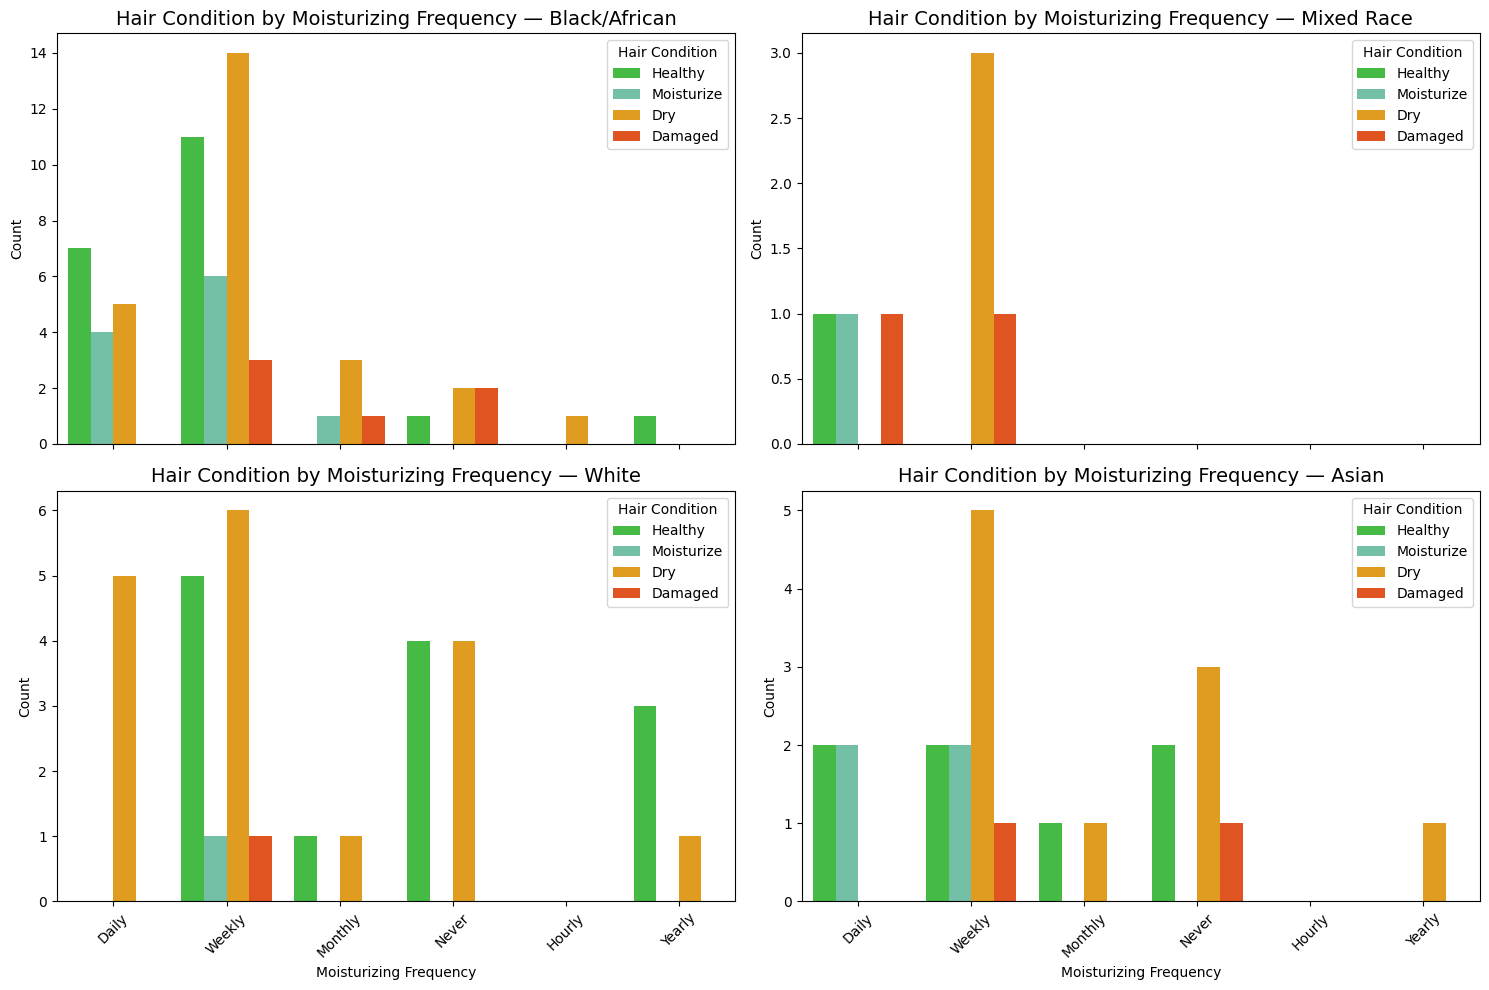

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set color order based on your hair_type_color_map
hair_state_order = ['Healthy', 'Moisturize', 'Dry', 'Damaged']
hair_type_color_map = {
    'Healthy': '#32CD32',    # LimeGreen
    'Moisturize': '#66CDAA', # MediumAquamarine
    'Dry': '#FFA500',        # Orange
    'Damaged': '#FF4500'     # OrangeRed
}
palette = [hair_type_color_map[state] for state in hair_state_order]

# Clean columns
df['race'] = df['race'].str.strip()
df['current_hair_condition'] = df['current_hair_condition'].str.strip()

# Filter valid hair states
df = df[df['current_hair_condition'].isin(hair_state_order)]

# Get list of unique races
races = df['race'].dropna().unique()
num_plots = len(races)

# Set number of rows and columns for subplots (2x2)
nrows, ncols = 2, 2

# Create figure and axes grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), sharex=True)

# Flatten axes array for easy iteration, in case nrows*ncols > number of races
axes = axes.flatten()

for i, race in enumerate(races):
    sns.countplot(
        data=df[df['race'] == race],
        x='how_often_do_you_hair_moisturizer',
        hue='current_hair_condition',
        hue_order=hair_state_order,
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f"Hair Condition by Moisturizing Frequency — {race}", fontsize=14)
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("Moisturizing Frequency")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title="Hair Condition")

# Remove empty subplots if any (when races < 4)
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


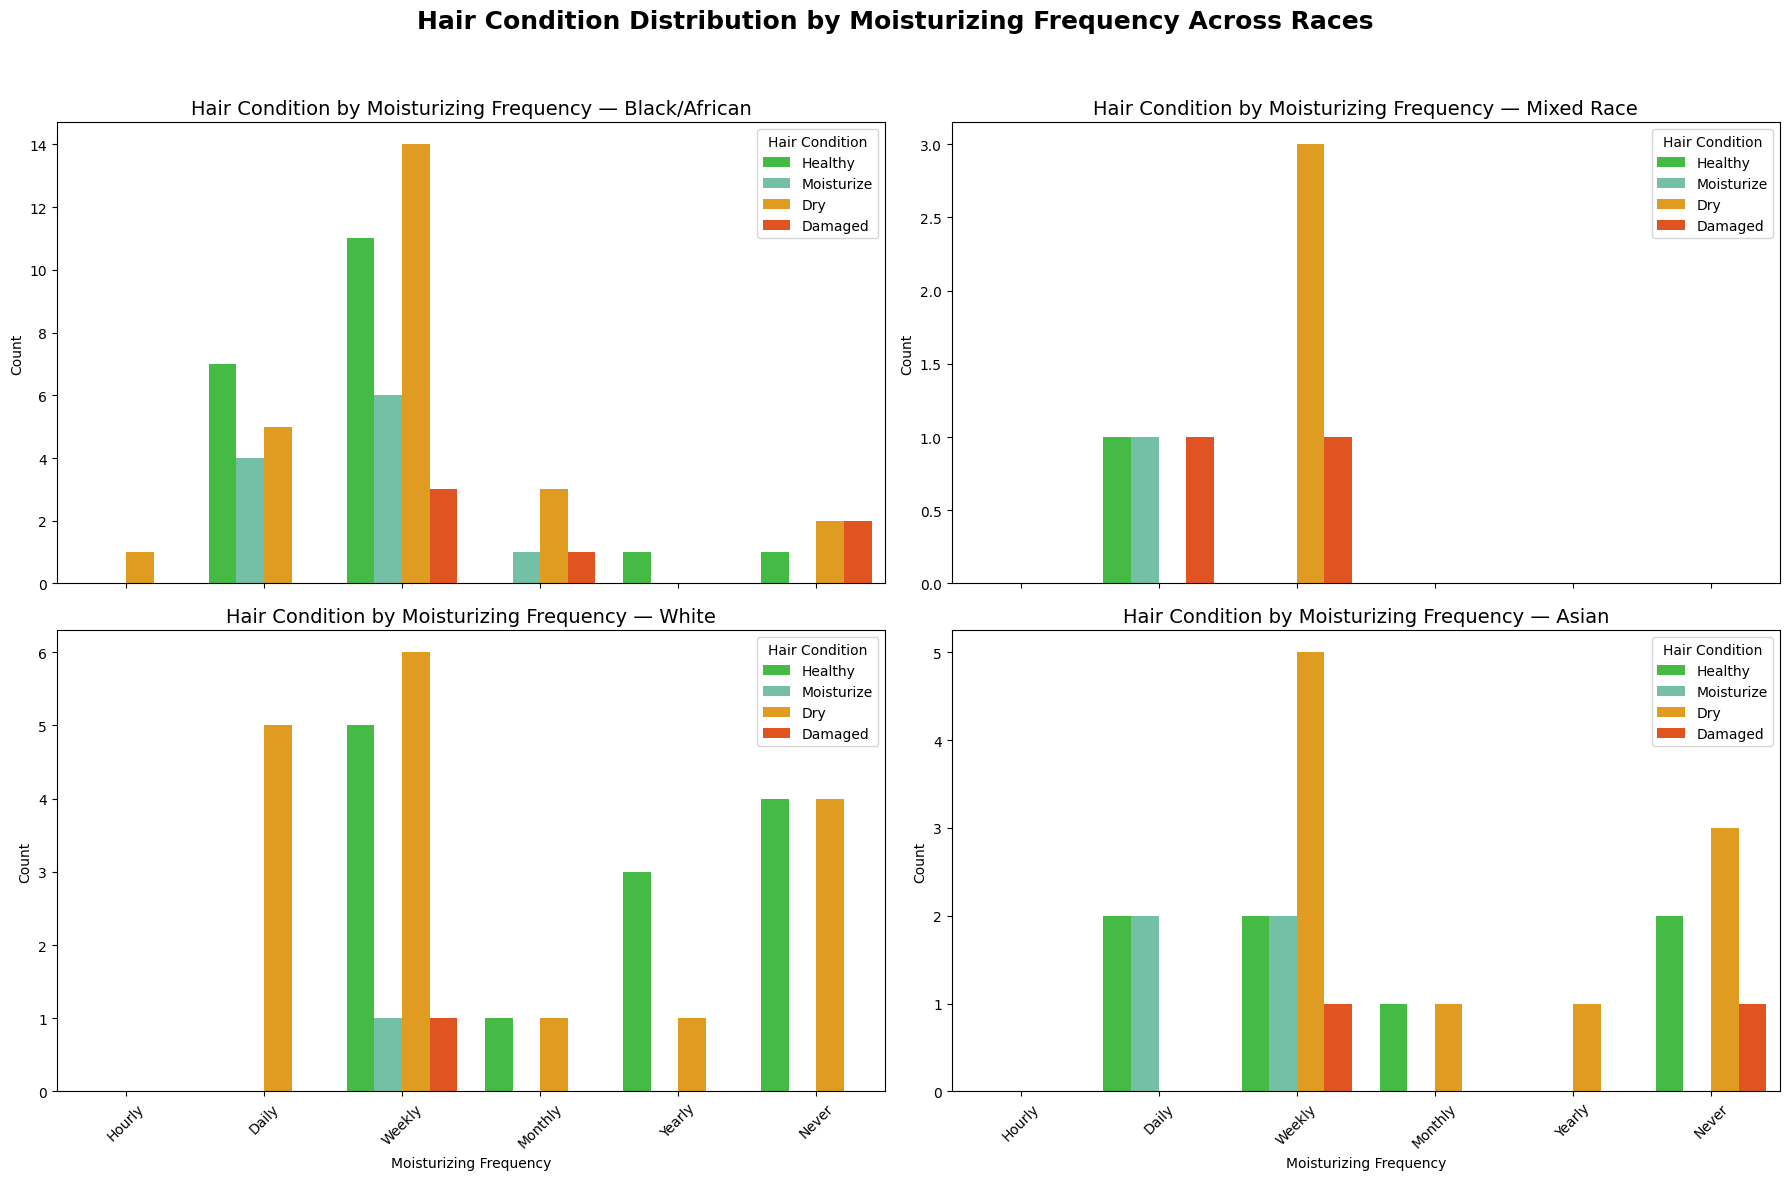

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Set up order and color map ===
moisture_order = ['Hourly', 'Daily', 'Weekly', 'Monthly', 'Yearly', 'Never']
hair_state_order = ['Healthy', 'Moisturize', 'Dry', 'Damaged']
hair_type_color_map = {
    'Healthy': '#32CD32',    # LimeGreen
    'Moisturize': '#66CDAA', # MediumAquamarine
    'Dry': '#FFA500',        # Orange
    'Damaged': '#FF4500'     # OrangeRed
}
palette = [hair_type_color_map[state] for state in hair_state_order]

# === Clean Data ===
df['race'] = df['race'].str.strip()
df['how_often_do_you_hair_moisturizer'] = df['how_often_do_you_hair_moisturizer'].str.strip()
df['current_hair_condition'] = df['current_hair_condition'].str.strip()

# Filter for relevant values
df = df[df['how_often_do_you_hair_moisturizer'].isin(moisture_order)]
df = df[df['current_hair_condition'].isin(hair_state_order)]

# === Plot one subplot per race ===
races = df['race'].dropna().unique()
n_races = len(races)

# Set subplot grid (e.g., 2x2)
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

for i, race in enumerate(races):
    ax = axes[i]
    sns.countplot(
        data=df[df['race'] == race],
        x='how_often_do_you_hair_moisturizer',
        order=moisture_order,
        hue='current_hair_condition',
        hue_order=hair_state_order,
        palette=palette,
        ax=ax
    )
    ax.set_title(f"Hair Condition by Moisturizing Frequency — {race}", fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Moisturizing Frequency")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Hair Condition")

# Hide unused subplots if races < total slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# === Add Main Title ===
fig.suptitle("Hair Condition Distribution by Moisturizing Frequency Across Races", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


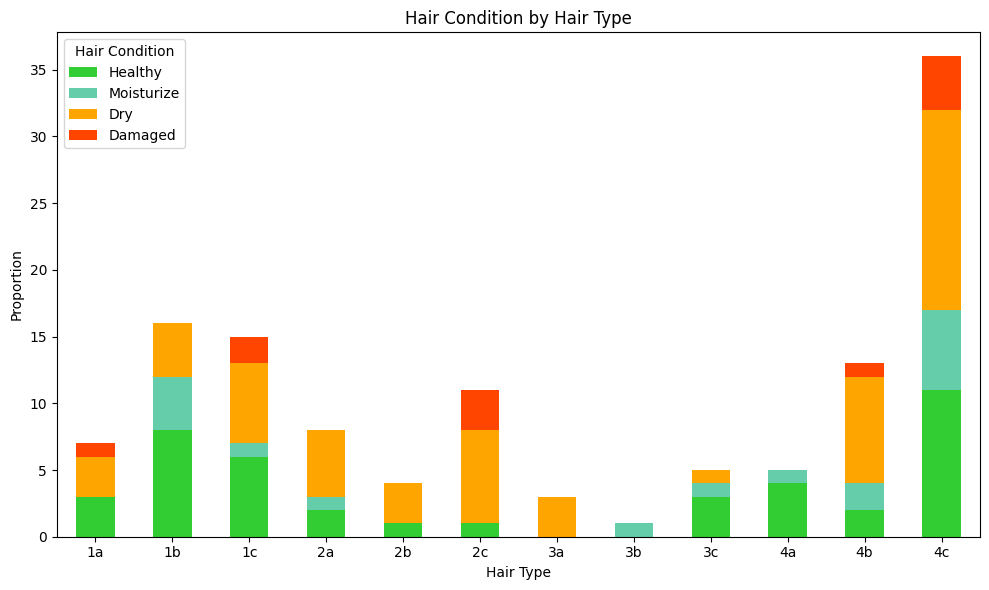

In [275]:
import matplotlib.pyplot as plt

# Define your color map in order matching the DataFrame columns
hair_type_color_map = {
    'Healthy': '#32CD32',    # LimeGreen
    'Moisturize': '#66CDAA', # MediumAquamarine
    'Dry': '#FFA500',        # Orange
    'Damaged': '#FF4500'     # OrangeRed
}

# Prepare data
hair_condition_props = (
    df.groupby('hair_type')['current_hair_condition']
    .value_counts(normalize=False)
    .unstack()
    .fillna(0)  # Ensure all columns are present
)

# Ensure columns appear in the correct color order
hair_condition_order = ['Healthy', 'Moisturize', 'Dry', 'Damaged']
colors = [hair_type_color_map[cond] for cond in hair_condition_order]

# Plot
hair_condition_props[hair_condition_order].plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(10, 6)
)

# Add titles and labels
plt.title('Hair Condition by Hair Type')
plt.ylabel('Proportion')
plt.xlabel('Hair Type')
plt.xticks(rotation=0)
plt.legend(title='Hair Condition')
plt.tight_layout()
plt.show()


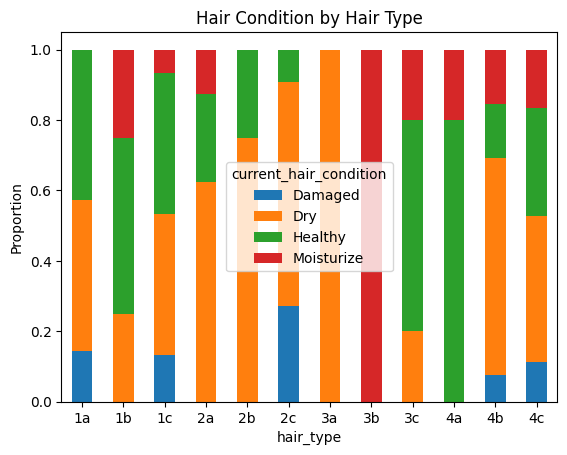

In [277]:
df.groupby('hair_type')['current_hair_condition'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Hair Condition by Hair Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


# ✅ Step 6: Treatment & Routine

## Moisturizing Frequency

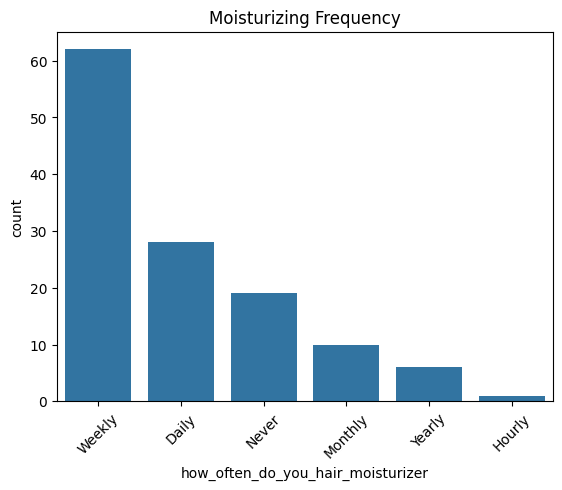

In [24]:
sns.countplot(data=df, x='how_often_do_you_hair_moisturizer', order=df['how_often_do_you_hair_moisturizer'].value_counts().index)
plt.title('Moisturizing Frequency')
plt.xticks(rotation=45)
plt.show()


## Chemical Treatments

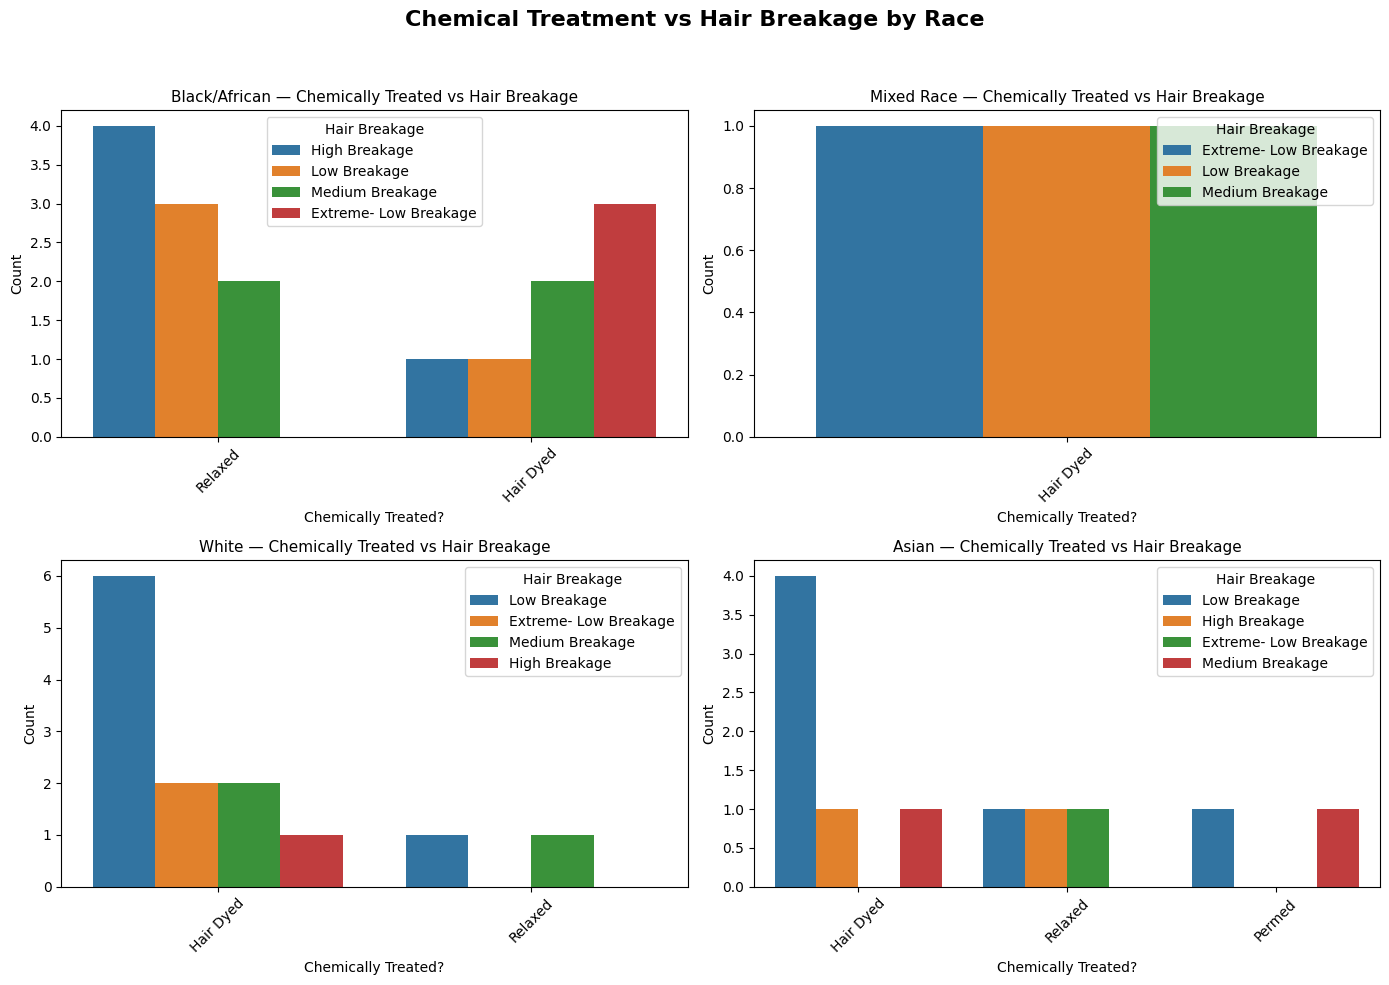

In [279]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Ensure column values are clean ===
df['race'] = df['race'].str.strip()
df['is_your_hair_chemically_treated'] = df['is_your_hair_chemically_treated'].str.strip()
df['hair_breakage'] = df['hair_breakage'].str.strip()

# === Filter rows with valid entries ===
df = df[df['race'].notna() & df['is_your_hair_chemically_treated'].notna() & df['hair_breakage'].notna()]

# === Prepare subplot layout ===
races = df['race'].unique()
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 10))
axes = axes.flatten()

# === Plot per race ===
for ax, race in zip(axes, races):
    sns.countplot(
        data=df[df['race'] == race],
        x='is_your_hair_chemically_treated',
        hue='hair_breakage',
        ax=ax
    )
    ax.set_title(f"{race} — Chemically Treated vs Hair Breakage", fontsize=11)
    ax.set_xlabel("Chemically Treated?")
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title="Hair Breakage")

# Hide unused subplots if race count < 4
for i in range(len(races), len(axes)):
    fig.delaxes(axes[i])

# === Main Title ===
fig.suptitle("Chemical Treatment vs Hair Breakage by Race", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## B. Hair Treatment Impact

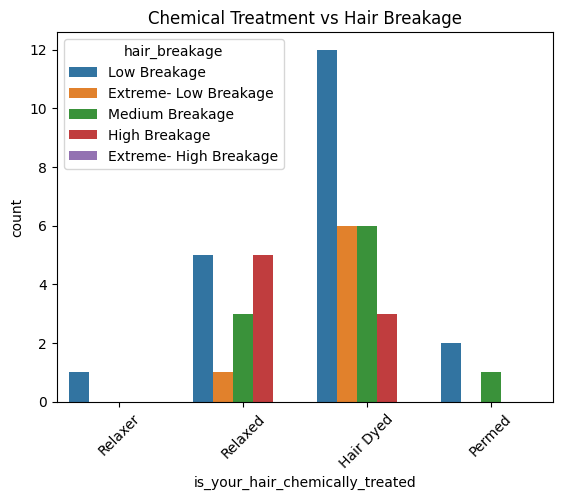

In [28]:
sns.countplot(data=df, x='is_your_hair_chemically_treated', hue='hair_breakage')
plt.title('Chemical Treatment vs Hair Breakage')
plt.xticks(rotation=45)
plt.show()

# ✅ Step 7: Protective Styles & Impact

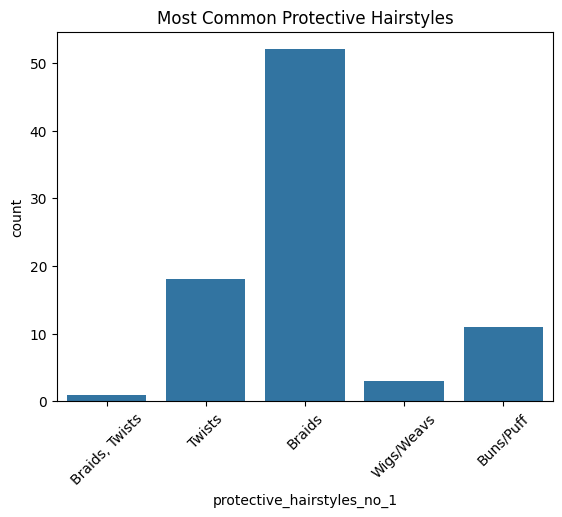

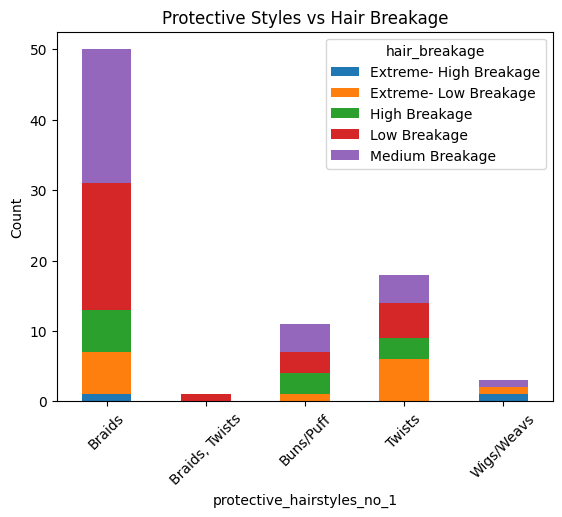

In [30]:
sns.countplot(data=df, x='protective_hairstyles_no_1')
plt.title('Most Common Protective Hairstyles')
plt.xticks(rotation=45)
plt.show()

pd.crosstab(df['protective_hairstyles_no_1'], df['hair_breakage']).plot(kind='bar', stacked=True)
plt.title('Protective Styles vs Hair Breakage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
